In [1]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


import warnings  
warnings.filterwarnings('ignore') 

## Importing the csv and re-shaping the dataframe

In [2]:
# Import the csv file as a dataframe
reviews=pd.read_csv(
    '~/Desktop/Data Analysis Course/Course 3/Assignement/LSE_DA301_assignment_files/turtle_reviews.csv')

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Remove redundant columns
reviews=reviews.drop(['language', 'platform'], axis=1)

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Rename columns
reviews.columns=['Gender','Age','Remuneration','Spending_Score','Loyalty_Points','Education','Product','Review','Summary']
reviews.head()

,Gender,Age,Remuneration,Spending_Score,Loyalty_Points,Education,Product,Review,Summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [39]:
# Save copy as csv
reviews.to_csv('~/Desktop/reviews.csv')

## Linear Regression

 Spending vs Loyalty

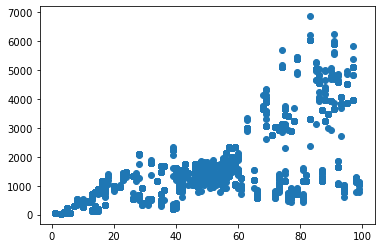

In [7]:
# Define the variables 
x=reviews['Spending_Score']
y=reviews['Loyalty_Points']

# Create a scatter plot
plt.scatter(x,y)

In [8]:
# Import the relevant libraries
from statsmodels.formula.api import ols

In [9]:
# Create the formula to pass through the model
f = 'y~x'
test = ols(f, data=reviews).fit()

# View the summary stats
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        08:44:40   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Extract the estimated parameters, std. err and predicted values
print("Parameters:", test.params)
print("Standard Error:", test.bse)
print("Predicted values:", test.predict())

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard Error: Intercept    45.930554
x             0.814419
dtype: float64
Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [11]:
# Set the the x coefficient to '33.062' and the constant to ’-75.053’ to generate the regression line.
y_pred = 33.062*reviews['Spending_Score'] - 75.053

y_pred

0       1214.365
1       2602.969
2        123.319
3       2470.721
4       1247.427
          ...   
1995    2206.225
1996     189.443
1997    2933.589
1998     453.939
1999     189.443
Name: Spending_Score, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

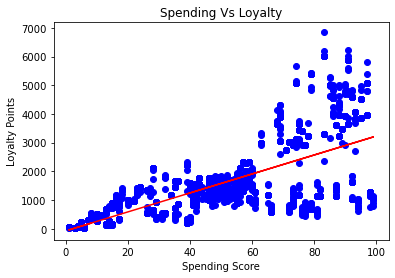

In [12]:
# Plot the scatter graph
plt.scatter(x,y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title("Spending Vs Loyalty")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

Renumeration vs loyalty

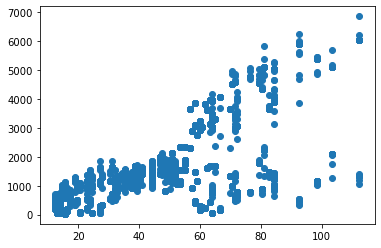

In [13]:
# Define the variables 
x=reviews['Remuneration']
y=reviews['Loyalty_Points']

# Create a scatter plot
plt.scatter(x,y)

In [14]:
# Create the formula to pass through the model
f = 'y~x'
test_2 = ols(f, data=reviews).fit()

# View the summary stats
test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        08:44:40   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters, std. err and predicted values
print("Parameters:", test_2.params)
print("Standard Error:", test_2.bse)
print("Predicted values:", test_2.predict())

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard Error: Intercept    52.170717
x             0.977925
dtype: float64
Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
y_pred_2=34.188*reviews["Remuneration"]-65.687
y_pred_2

0        354.82540
1        354.82540
2        382.85956
3        382.85956
4        410.89372
           ...    
1995    2821.83148
1996    3102.17308
1997    3102.17308
1998    3298.41220
1999    3102.17308
Name: Remuneration, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

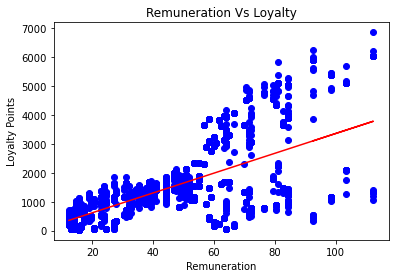

In [17]:
# Plot the scatter graph
plt.scatter(x,y, color='blue')
plt.plot(x, y_pred_2, color='red')
plt.title("Remuneration Vs Loyalty")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

Age vs Loyalty

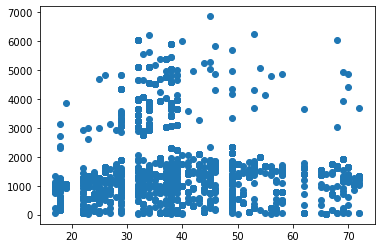

In [18]:
# Define the variables 
x=reviews['Age']
y=reviews['Loyalty_Points']

# Create a scatter plot
plt.scatter(x,y)

In [19]:
# Create the formula to pass through the model
f = 'y~x'
test_3 = ols(f, data=reviews).fit()

# View the summary stats
test_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 09 Aug 2022   Prob (F-statistic):             0.0577
Time:                        08:44:40   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters, std. err and predicted values
print("Parameters:", test_3.params)
print("Standard Error:", test_3.bse)
print("Predicted values:", test_3.predict())

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard Error: Intercept    88.248731
x             2.113177
dtype: float64
Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [21]:
# Generate regression line
y_pred_3=1736.528*reviews["Age"]-4.013
y_pred_3

0       31253.491
1       39936.131
2       38199.603
3       43409.187
4       57301.411
          ...    
1995    64247.523
1996    74666.691
1997    59037.939
1998    59037.939
1999    55564.883
Name: Age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

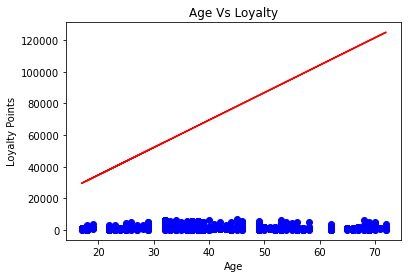

In [22]:
# Plot the scatter graph
plt.scatter(x,y, color='blue')
plt.plot(x, y_pred_3, color='red')
plt.title("Age Vs Loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

Observations

Assumptions made before starting the analysis were that spending and remunerations would have a direct effect on the number of loyalty points earned by the customers. There is a relationship between spending and loyalty and remuneration and loyalty. This is no relationship between age and loyalty though



# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

### Load and explore the data

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the CSV file(s) as df2.
df2=pd.read_csv('~/Desktop/reviews.csv')

# View DataFrame.
df2.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Remuneration', 'Spending_Score',
       'Loyalty_Points', 'Education', 'Product', 'Review', 'Summary'],
      dtype='object')

In [45]:
# Drop unnecessary columns.
df2.drop(columns=['Unnamed: 0','Gender','Age','Loyalty_Points','Education','Product','Review','Summary'],
        inplace=True)

KeyError: "['Unnamed: 0' 'Gender' 'Age' 'Loyalty_Points' 'Education' 'Product'\n 'Review' 'Summary'] not found in axis"

In [46]:
# View DataFrame.
df2.head()

,Remuneration,Spending_Score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [47]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Remuneration    2000 non-null   float64
 1   Spending_Score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [48]:
# Descriptive statistics.
df2.describe()

,Remuneration,Spending_Score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


### Plot the data

<AxesSubplot:xlabel='Remuneration', ylabel='Spending_Score'>

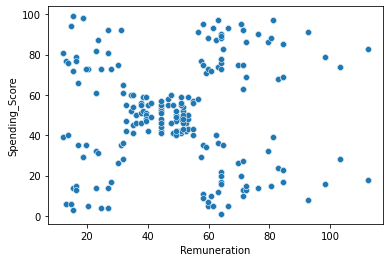

In [49]:
# Create a scatterplot with Seaborn
sns.scatterplot(x='Remuneration', y='Spending_Score', data = df2)

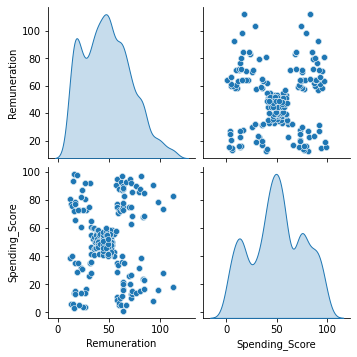

In [51]:
# Create a pairplot with Seaborn.
x=df2[['Remuneration','Spending_Score']]

sns.pairplot(vars=x, data=df2, diag_kind='kde' )

### Elbow and Silhouette Methods

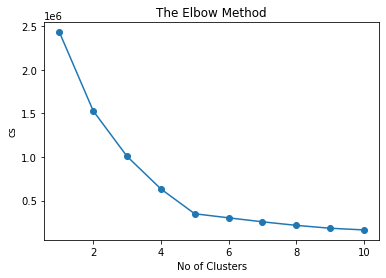

In [53]:
# Determine the number of clusters: Elbow method.
# Import required packages
from sklearn.cluster import KMeans

# Create an empty list called cs to store the cluster sizes
cs=[]

# Employ a loop with a range from 1 to 10 to test cluster sizes with each number of clusters
for i in range(1,11):
    # Create an object kmeans based on the KMeans() class, and specify some parameters. 
    kmeans= KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
    # Apply the fit() method with the X data set to the current kmeans object.
    kmeans.fit(x)
    # Add the inertia value of the current kmeans object to the cs.list using the append() function.
    cs.append(kmeans.inertia_)
    
# Plot the reate a plot with a range between 1 and 10, using the cs list as the data source
plt.plot(range(1,11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("cs")

plt.show()

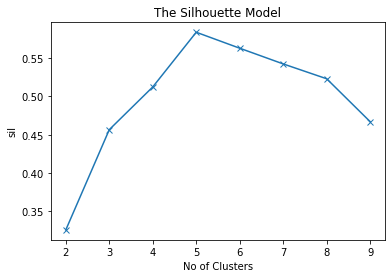

In [54]:
# Determine the number of clusters: Silhouette method.
# Import the required packages
from sklearn.metrics import silhouette_score

# Create an empty list called sil to store the different cluster sizes and set kmax=10 
# (indicating the maximum number of clusters to be plotted on the graph).
sil=[]
kmax=10

# Employ a loop to iterate through range from 2-10
for k in range(2,10):
    # Create an object kmeans based
    # Set the number of clusters to the current iteration of the loop (n_clusters=k) and apply the fit(x)
    kmeans_s=KMeans(n_clusters=k).fit(x)
    # Add the labels 
    labels=kmeans_s.labels_
    # Add the silhouette score to the sil list using append. Add the labels, specify model(x) and metric='euclidean'
    sil.append(silhouette_score(x, labels, metric='euclidean'))
    
# Create a plot
plt.plot(range(2,10), sil, marker='x')
plt.title("The Silhouette Model")
plt.xlabel("No of Clusters")
plt.ylabel("sil")

plt.show()

### Evaluate K-means model with different k values

#### 4 Clusters

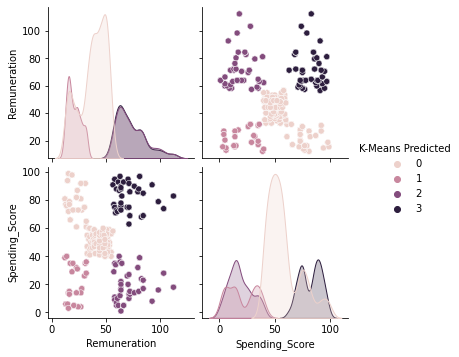

In [56]:
# create an object kmeans, call the KMeans with 4 clusters
kmeans=KMeans(n_clusters=4, random_state=0, max_iter=15000, init='k-means++').fit(x)

# The labels will be used to identify the clusters.
clusters=kmeans.labels_
x['K-Means Predicted']=clusters

# Create a pairplot to visualise the outcome
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')

In [57]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [58]:
# View the k-means predicted
print(x.head())

   Remuneration  Spending_Score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


#### 3 Clusters

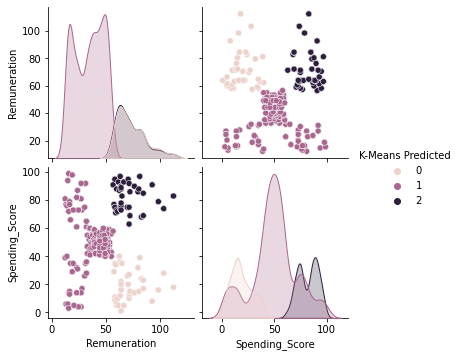

In [67]:
# create an object kmeans, call the KMeans with 3 clusters
kmeans_3=KMeans(n_clusters=3, random_state=0, max_iter=15000, init='k-means++').fit(x)

# The labels will be used to identify the clusters.
clusters=kmeans_3.labels_
x['K-Means Predicted']=clusters

# Create a pairplot to visualise the outcome
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')

In [68]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

In [69]:
# View the k-means predicted
print(x.head())

   Remuneration  Spending_Score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  1
2         13.12               6                  1
3         13.12              77                  1
4         13.94              40                  1


##### 5 Clusters

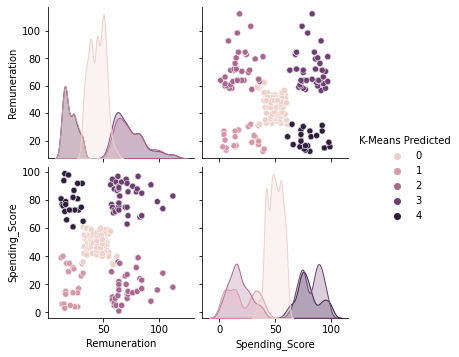

In [71]:
# create an object kmeans, call the KMeans with 5 clusters
kmeans_5=KMeans(n_clusters=5, random_state=0, max_iter=15000, init='k-means++').fit(x)

# The labels will be used to identify the clusters.
clusters=kmeans_5.labels_
x['K-Means Predicted']=clusters

# Create a pairplot to visualise the outcome
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')

In [72]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [73]:
# View the k-means predicted
print(x.head())

   Remuneration  Spending_Score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


### Plot and Interpret the Clusters

<AxesSubplot:xlabel='Remuneration', ylabel='Spending_Score'>

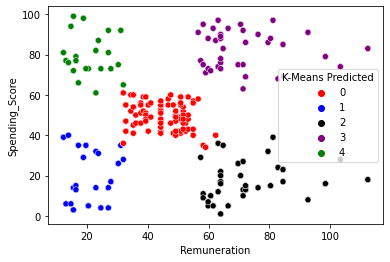

In [75]:
# Visualising the clusters.
# Plot on a scatter
sns.scatterplot(x='Remuneration', y='Spending_Score', hue='K-Means Predicted', data=x, palette=['red','blue','black','purple','green'])

# View the DataFrame.


## 7. Discuss: Insights and observations

From the initial pairplot before the Elbow or Silhouette Models had been used it was apparent that there could be 5 distinct clusters. The Silhouette and Elbow Models supported this theory, with the elbow flattening out at 5 or 6, and the Sihouette peaking at 5. The number of observations is more evenly distributed with 5 clusters, and this also splits out what looks like 4 distinct types of customer. Low Spend, low remuneration; high spend, low remuneration; low spend, high remuneration; and high spend, high remuneration. 3 and 4 clusters were grouping some of these customers into the same cluster, and I feel that to answer the business question "how groups within the customer base can be used to target specific market segments".